In [280]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [281]:
np.random.seed(0)

In [282]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [283]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [284]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28*28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28*28'

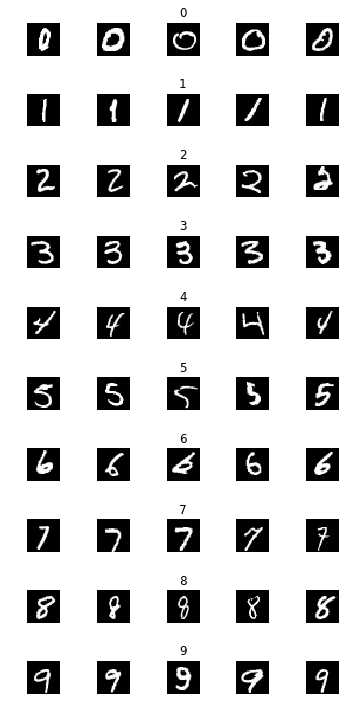

In [285]:
num_of_samples=[]
cols=5
num_classes=10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

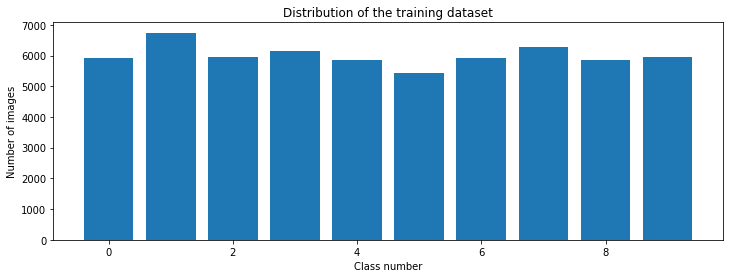

In [286]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [287]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [289]:
num_pixels = 784
X_train=X_train.reshape(X_train.shape[0], 784)
X_test=X_test.reshape(X_test.shape[0], 784)
print(X_test.shape)

(10000, 784)


In [290]:
def create_model():
    model=Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [291]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


In [292]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.6169 - acc: 0.8044 - val_loss: 0.3274 - val_acc: 0.9012
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.3608 - acc: 0.8950 - val_loss: 0.2842 - val_acc: 0.9188
Epoch 3/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.3117 - acc: 0.9081 - val_loss: 0.2760 - val_acc: 0.9212
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2970 - acc: 0.9127 - val_loss: 0.2786 - val_acc: 0.9228
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2804 - acc: 0.9173 - val_loss: 0.2296 - val_acc: 0.9355
Epoch 6/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2663 - acc: 0.9212 - val_loss: 0.2218 - val_acc: 0.9363
Epoch 7/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2573 - acc: 0.9238 - val_loss: 0.2369 - val_acc:

Text(0.5, 0, 'epoch')

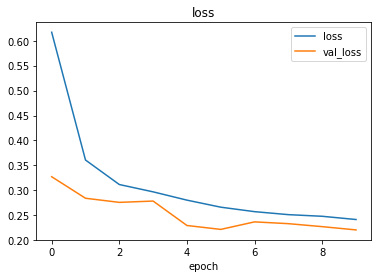

In [293]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

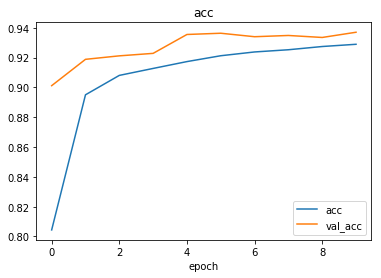

In [294]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')
plt.xlabel('epoch')

In [295]:
score=model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
[0.26384427768588065, 0.9254]
Test loss: 0.26384427768588065
Test accuracy: 0.9254


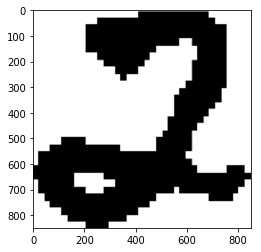

In [296]:
import requests
from PIL import Image
url='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)
(28, 28, 4)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0

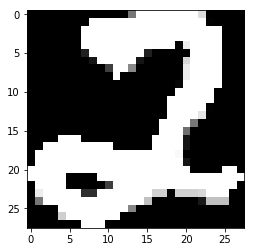

In [297]:
import cv2
img_array=np.asarray(img)
print(img_array.shape)
resized=cv2.resize(img_array, (28,28))
print(resized.shape)
gray_scale=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [298]:
image = image/255
image = image.reshape(1,784)

In [299]:
prediction = model.predict_classes(image)
print('predicted digit:', str(prediction))

predicted digit: [2]
